![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_20720\2343420522.py:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Fernanda\AppData\Local\Temp\ipykernel_20720\2343420522.py:27: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Fernanda\AppData\Local\Temp\ipykernel_20720\2343420522.py:31: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [3]:
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [2]:
PCA_X_train = PCA().fit(X_train)

In [4]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 234 ms
Wall time: 251 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [7]:
PCA_X_train_pad = PCA().fit(X_train_pad)

In [8]:
PCA_X_train.explained_variance_[0:5]

array([34.82363041,  2.73504627,  2.29439284,  1.04377529,  0.943517  ])

In [9]:
PCA_X_train_pad.explained_variance_[0:5]

array([284.88237655,  36.9176163 ,  15.74411031,  14.0471749 ,
        10.59327893])

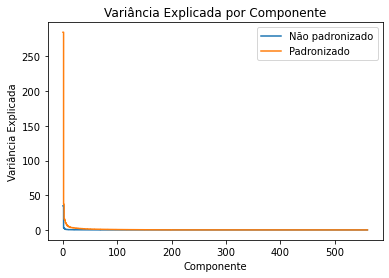

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Explicada")
ax.set_title("Variância Explicada por Componente")
ax.plot(PCA_X_train.explained_variance_, label="Não padronizado",    drawstyle="steps-post")
ax.plot(PCA_X_train_pad.explained_variance_, label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

In [11]:
PCA_X_train.explained_variance_.cumsum()[0:5]

array([34.82363041, 37.55867667, 39.85306951, 40.89684481, 41.84036181])

In [12]:
PCA_X_train_pad.explained_variance_.cumsum()[0:20]

array([284.88237655, 321.79999285, 337.54410316, 351.59127806,
       362.18455699, 371.85623299, 379.54760733, 386.27443311,
       391.86120496, 397.27534074, 402.10023049, 406.58980662,
       410.87582624, 414.49612151, 418.04346109, 421.40790202,
       424.69957121, 427.92760668, 431.11364375, 434.07177307])

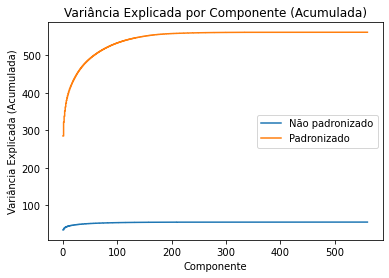

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Explicada (Acumulada)")
ax.set_title("Variância Explicada por Componente (Acumulada)")
ax.plot(PCA_X_train.explained_variance_.cumsum(), label="Não padronizado",    drawstyle="steps-post")
ax.plot(PCA_X_train_pad.explained_variance_.cumsum(), label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

In [14]:
PCA_X_train.explained_variance_ratio_[0:5]

array([0.6255444 , 0.04913023, 0.04121467, 0.01874956, 0.0169486 ])

In [15]:
PCA_X_train_pad.explained_variance_ratio_[0:5]

array([0.50781172, 0.0658068 , 0.02806437, 0.02503953, 0.01888285])

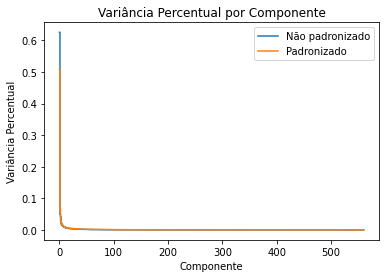

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Percentual")
ax.set_title("Variância Percentual por Componente")
ax.plot(PCA_X_train.explained_variance_ratio_, label="Não padronizado",    drawstyle="steps-post")
ax.plot(PCA_X_train_pad.explained_variance_ratio_, label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

In [17]:
PCA_X_train.explained_variance_ratio_.cumsum()[0:10]

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430816, 0.77607501, 0.78676474, 0.79645854, 0.80503872])

In [18]:
PCA_X_train_pad.explained_variance_ratio_.cumsum()[0:10]

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569])

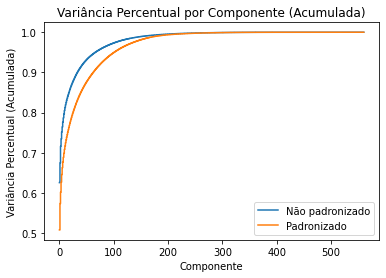

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("Componente")
ax.set_ylabel("Variância Percentual (Acumulada)")
ax.set_title("Variância Percentual por Componente (Acumulada)")
ax.plot(PCA_X_train.explained_variance_ratio_.cumsum(), label="Não padronizado",    drawstyle="steps-post")
ax.plot(PCA_X_train_pad.explained_variance_ratio_.cumsum(), label="Padronizado", drawstyle="steps-post")

ax.legend()
plt.show()

In [20]:
ncomp_crit = (PCA_X_train.explained_variance_ratio_.cumsum()<.90).sum()+1

print(f'Número de componentes para dados não padronizados: {ncomp_crit}')

Número de componentes para dados não padronizados: 34


In [21]:
ncomp_crit = (PCA_X_train_pad.explained_variance_ratio_.cumsum()<.90).sum()+1

print(f'Número de componentes para dados padronizados: {ncomp_crit}')

Número de componentes para dados padronizados: 63


#### Conclusão: 
Neste item observamos que padronizar a base de dados acaba aumentando a variância explicada dos componentes do PCA, portanto a base inicial acaba sendo melhor (em questão de tempo para rodar o modelo), utiliza menos componentes para explicar 90% da variância o que resulta em uma modelagem mais rápida comparada a da base de dados padronizada.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [22]:
pc_treino = PCA_X_train.transform(X_train)
pc_teste  = PCA_X_train.transform(X_test)

In [23]:
n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)
    
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)

In [24]:
%%time

clf = clf.fit(pc_train, y_train)

CPU times: total: 78.1 ms
Wall time: 83.8 ms


In [25]:
acc_tr = clf.score(pc_train, y_train)
acc_te = clf.score(pc_test, y_test)

In [26]:
print(f'A acurácia na base sem padronização de treinos é: {acc_tr}')
print(f'A acurácia na base sem padronização de testes é: {acc_te}')

A acurácia na base sem padronização de treinos é: 0.8926822633297062
A acurácia na base sem padronização de testes é: 0.8238887003732609


In [27]:
pc_treino_pad = PCA_X_train_pad.transform(X_train)
pc_teste_pad  = PCA_X_train_pad.transform(X_test)

In [28]:
n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train_pad = pd.DataFrame(pc_treino_pad[:,:n], columns = colunas)
pc_test_pad  = pd.DataFrame( pc_teste_pad[:,:n], columns = colunas)
    
clf_pad = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)

In [29]:
%%time

clf_pad = clf_pad.fit(pc_train_pad, y_train)

CPU times: total: 62.5 ms
Wall time: 68.9 ms


In [30]:
acc_tr_pad = clf.score(pc_train_pad, y_train)
acc_te_pad = clf.score(pc_test_pad, y_test)

In [31]:
print(f'A acurácia na base com padronização de treinos é: {acc_tr_pad}')
print(f'A acurácia na base com padronização de testes é: {acc_te_pad}')

A acurácia na base com padronização de treinos é: 0.18865614798694233
A acurácia na base com padronização de testes é: 0.1808618934509671


#### Conclusão: 
Aqui temos que a base não padronizada resultou em uma acurácia muito maior, mas isso é explicado devido a utilizarmos apenas 10 componentes principais, no item anterior observamos que a base padronizada necessitava de mais componentes para uma mesma porcentagem de variância. Agora a diferença entre as acurácias entre bases de teste e treino na base padronizada se mostrou bem inferior a diferença da base não padronizada.